# 3-Layer Neural Network

* Layer Neural Network form scratch using Pytorch(Without using built in functionalities)

In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import umap
from mpl_toolkits.mplot3d import Axes3D

# Non-Linearity

* Consider a non-linear equation
y = 3x1 - x2 + 0.5x3 + 1.5, where w0, w1, w3, b = 3, -1, 0.5, 1.5

In [3]:
n = 100  # number of sample

d = 3  # 3-dimensional

x = 2 * torch.rand((n, d)) - 1
x

tensor([[ 0.8675,  0.6656,  0.0446],
        [ 0.9123,  0.3831, -0.1576],
        [ 0.2360,  0.8060, -0.7407],
        [-0.2076, -0.5494, -0.4588],
        [ 0.0649, -0.9811, -0.0085],
        [-0.6016, -0.9885,  0.1120],
        [ 0.9961, -0.8553, -0.5468],
        [ 0.1960,  0.4827, -0.4250],
        [ 0.2709,  0.8633,  0.2327],
        [ 0.5670, -0.0109,  0.7317],
        [ 0.6760,  0.2135, -0.4610],
        [ 0.6054, -0.3587, -0.9540],
        [ 0.1189,  0.2997, -0.5710],
        [-0.2038, -0.8156, -0.8934],
        [-0.4680,  0.3258, -0.6676],
        [-0.4214, -0.1442, -0.6717],
        [ 0.9698,  0.4283,  0.6222],
        [ 0.9529,  0.6976, -0.0096],
        [-0.8925, -0.6500,  0.9844],
        [-0.1788, -0.9987,  0.2695],
        [ 0.3957, -0.0760,  0.2780],
        [ 0.6072,  0.2004, -0.7284],
        [-0.3768,  0.0787, -0.3116],
        [ 0.4644, -0.0326,  0.2905],
        [ 0.8756, -0.3547,  0.9270],
        [-0.0170, -0.2718,  0.0453],
        [ 0.2128,  0.1045,  0.2536],
 

x: torch.Size([100, 3]), weights: torch.Size([3, 1]), bias: torch.Size([1]), y: torch.Size([100, 1])


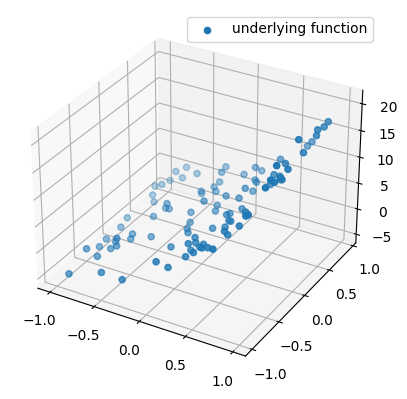

In [4]:
#y = 3x^3 - x^2 + 0.5x + 1.5

#weights_true = np.array([[3, -1, 0.5],]).T
#bias_true = np.array([1.5])

n, d = 100, 3

x = 2 * torch.rand((n, d)) - 1

weights_true = torch.tensor([[6], [1], [1]], dtype=torch.float32)
bias_true = torch.tensor([1])

y_true = (x ** 3) @ weights_true + (x ** 2) @ weights_true + x @ weights_true + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_4d(X, y, y_pred=None):
 # Compute a 3D embedding of the data using UMAP
  umap_3d = umap.UMAP(n_components=3)
  X_umap_3d = umap_3d.fit_transform(X)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_4d(x, y_true)

In [5]:
class Linear:
  def __init__(self, input_dim, num_hidden=1):
    self.weights = torch.randn(input_dim, num_hidden) * torch.sqrt(torch.tensor(2.0 / input_dim))
    self.bias = torch.zeros(num_hidden)

  def __call__(self, x):
    return x @ self.weights + self.bias

# MSE

In [6]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()

# Back Propagation

In [7]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = torch.randn(input_dim, num_hidden) * torch.sqrt(torch.tensor(2.0 / input_dim))
    self.bias = torch.zeros(num_hidden)

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [8]:
from typing import Callable

def fit(x: torch, y: torch, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)


Epoch 0, loss 65.72673797607422
Epoch 1, loss 52.846614837646484
Epoch 2, loss 43.414344787597656
Epoch 3, loss 36.350120544433594
Epoch 4, loss 30.942171096801758
Epoch 5, loss 26.71636199951172
Epoch 6, loss 23.352825164794922
Epoch 7, loss 20.632431030273438
Epoch 8, loss 18.402376174926758
Epoch 9, loss 16.553970336914062
Epoch 10, loss 15.008214950561523
Epoch 11, loss 13.706416130065918
Epoch 12, loss 12.603994369506836
Epoch 13, loss 11.666374206542969
Epoch 14, loss 10.866238594055176
Epoch 15, loss 10.181629180908203
Epoch 16, loss 9.594655990600586
Epoch 17, loss 9.090566635131836
Epoch 18, loss 8.657083511352539
Epoch 19, loss 8.283910751342773
Epoch 20, loss 7.962360858917236
Epoch 21, loss 7.685074329376221
Epoch 22, loss 7.445788383483887
Epoch 23, loss 7.239166736602783
Epoch 24, loss 7.060643196105957
Epoch 25, loss 6.906312942504883
Epoch 26, loss 6.772822380065918
Epoch 27, loss 6.657299995422363
Epoch 28, loss 6.557272434234619
Epoch 29, loss 6.470621109008789
Epoch 

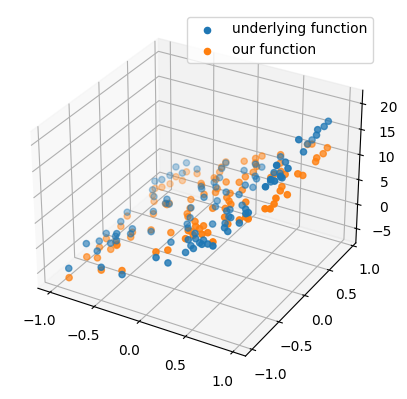

In [9]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_4d(x, y_true, linear(x))

####To avoid this underfitting, introduce relu layer where it clips all the values less than 0 to 0 and leaves the rest as is.

In [10]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = torch.clamp(input_, min=0, max=float('inf'))
        #self.output = np.clip(self.input_, 0, None)
        return self.output

    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = [1, 0.5, 0, -0.5, -1]
input_tensor = torch.tensor(input_).unsqueeze(1)
#input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_tensor))
print(relu.backward(input_tensor))

tensor([[1.0000],
        [0.5000],
        [0.0000],
        [0.0000],
        [0.0000]])
tensor([[1.0000],
        [0.5000],
        [0.0000],
        [-0.0000],
        [-0.0000]])


tensor(63.6979)


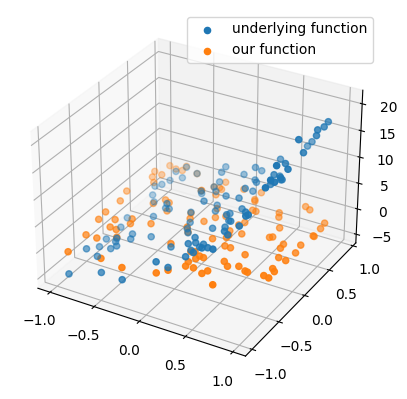

In [11]:
import torch

class Model:
  def __init__(self, input_dim, num_hidden1):
    self.linear1 = Linear(input_dim, num_hidden1)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden1, num_hidden1)
    self.linear3 = Linear(num_hidden1, 1)

  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu(l1)
    l2 = self.linear2(r1)
    r2 = self.relu(l2)
    l3 = self.linear3(r2)
    return l3

  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu_gradient2 = self.relu.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu_gradient2)
    relu_gradient1 = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient1)
    return linear1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 20)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_4d(x, y_true, y_pred)

In [12]:
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.01)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

tensor(57.1328)
tensor(53.0006)


Epoch 0, loss 53.000648498535156
Epoch 1, loss 49.406097412109375
Epoch 2, loss 46.01885223388672
Epoch 3, loss 42.625587463378906
Epoch 4, loss 39.160926818847656
Epoch 5, loss 35.57460021972656
Epoch 6, loss 32.01401138305664
Epoch 7, loss 28.524032592773438
Epoch 8, loss 25.190221786499023
Epoch 9, loss 22.067441940307617
Epoch 10, loss 19.325170516967773
Epoch 11, loss 17.05321502685547
Epoch 12, loss 15.19275188446045
Epoch 13, loss 13.413808822631836
Epoch 14, loss 12.025594711303711
Epoch 15, loss 11.060254096984863
Epoch 16, loss 10.351268768310547
Epoch 17, loss 9.810779571533203
Epoch 18, loss 9.333861351013184
Epoch 19, loss 8.916400909423828
Epoch 20, loss 8.531925201416016
Epoch 21, loss 8.192802429199219
Epoch 22, loss 7.884050369262695
Epoch 23, loss 7.594039440155029
Epoch 24, loss 7.315335750579834
Epoch 25, loss 7.0630598068237305
Epoch 26, loss 6.834941864013672
Epoch 27, loss 6.616335391998291
Epoch 28, loss 6.412802696228027
Epoch 29, loss 6.216440200805664
Epoch 3

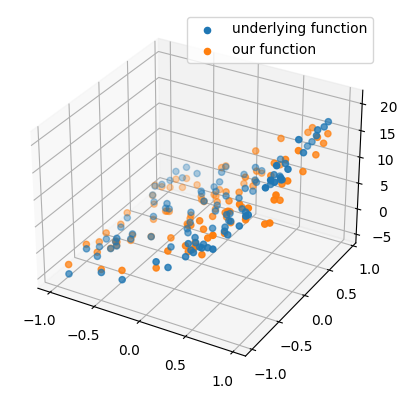

In [13]:
fit(x, y_true, model=model, loss=loss, lr=0.01, num_epochs=40)
plot_4d(x, y_true, model(x))

* With learning rate = 0.01, our model fits well with the data points.